In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
my_filepath ='../input/smart-home-dataset-with-weather-information/HomeC.csv'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-home-dataset-with-weather-information/HomeC.csv


In [2]:
df = pd.read_csv(os.path.join(dirname, filename), low_memory=False)
df1 = pd.read_csv('../input/smart-home-dataset-with-weather-information/HomeC.csv', delimiter=',', nrows = 1000)
df1.dataframeName = 'HomeC.csv'
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
my_data = pd.read_csv(my_filepath  ,   parse_dates=True)
home_dat = my_data.select_dtypes(exclude=['object'])
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_dat = home_dat.set_index(time_index)
energy_data = df.filter(items=[ 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
                                     'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]'])
energy_data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483
1,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467
2,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467
3,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483
4,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233
503907,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217
503908,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217
503909,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233


In [4]:
def plot_bars(col):
    
    import matplotlib.pyplot as plt 
    from matplotlib.pyplot import figure

    figure(figsize=(14, 8), dpi=80)
    plt.xticks(rotation = 90)
    
    D = energy_data[col].value_counts(normalize=True).to_dict()

    plt.bar(*zip(*D.items()))
    plt.show()

In [5]:
my_filepath ='../input/smart-home-dataset-with-weather-information/HomeC.csv'
my_data = pd.read_csv(my_filepath  ,   parse_dates=True)
home_dat = my_data.select_dtypes(exclude=['object'])

# you can convert a time from unix epoch timestamp to normal stamp using 
# import time 
# print( ' start ' , time.strftime('%Y-%m-%d %H:%S', time.localtime(1451624400)))


time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_dat = home_dat.set_index(time_index)
energy_data = home_dat.filter(items=[ 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
                                     'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]'])

weather_data = home_dat.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

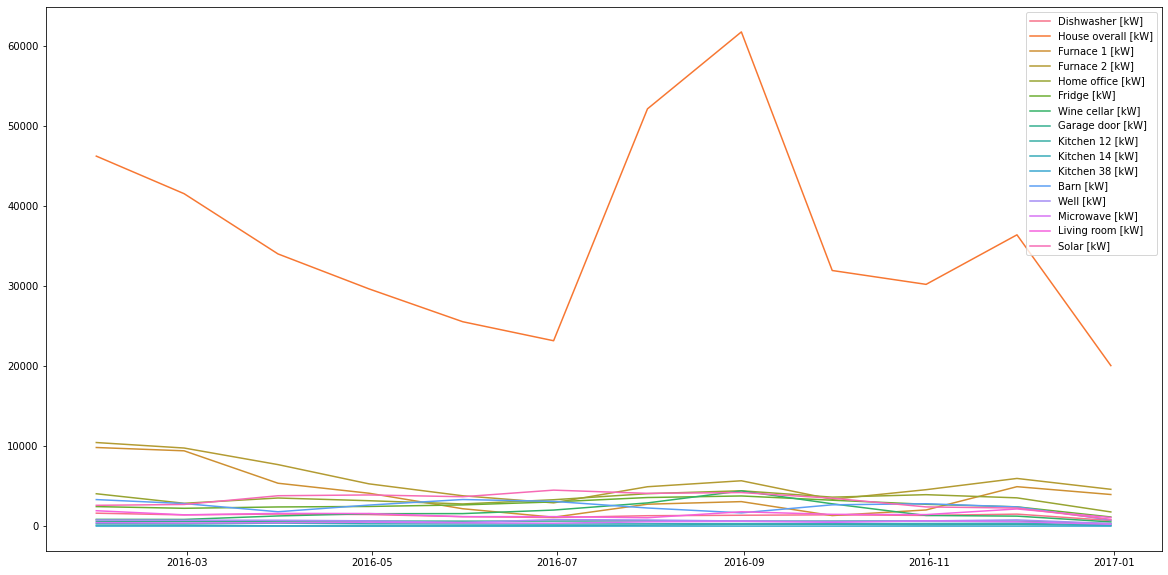

In [6]:
energy_per_month = energy_data.resample('M').sum() # for energy we use sum to calculate overall consumption in period 
plt.figure(figsize=(20,10))
sns.lineplot(data= energy_per_month.filter(items=[ 'Dishwasher [kW]','House overall [kW]',
                                     'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']) , dashes=False  )
# use power == house overall
# gen power == solar 

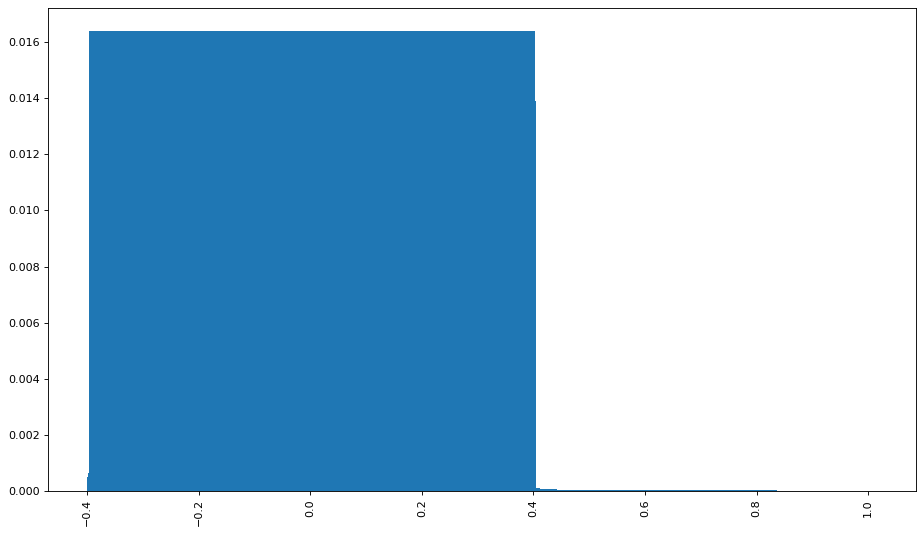

In [7]:
plot_bars('gen [kW]')


In [8]:
#plot_bars('summary')

In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__

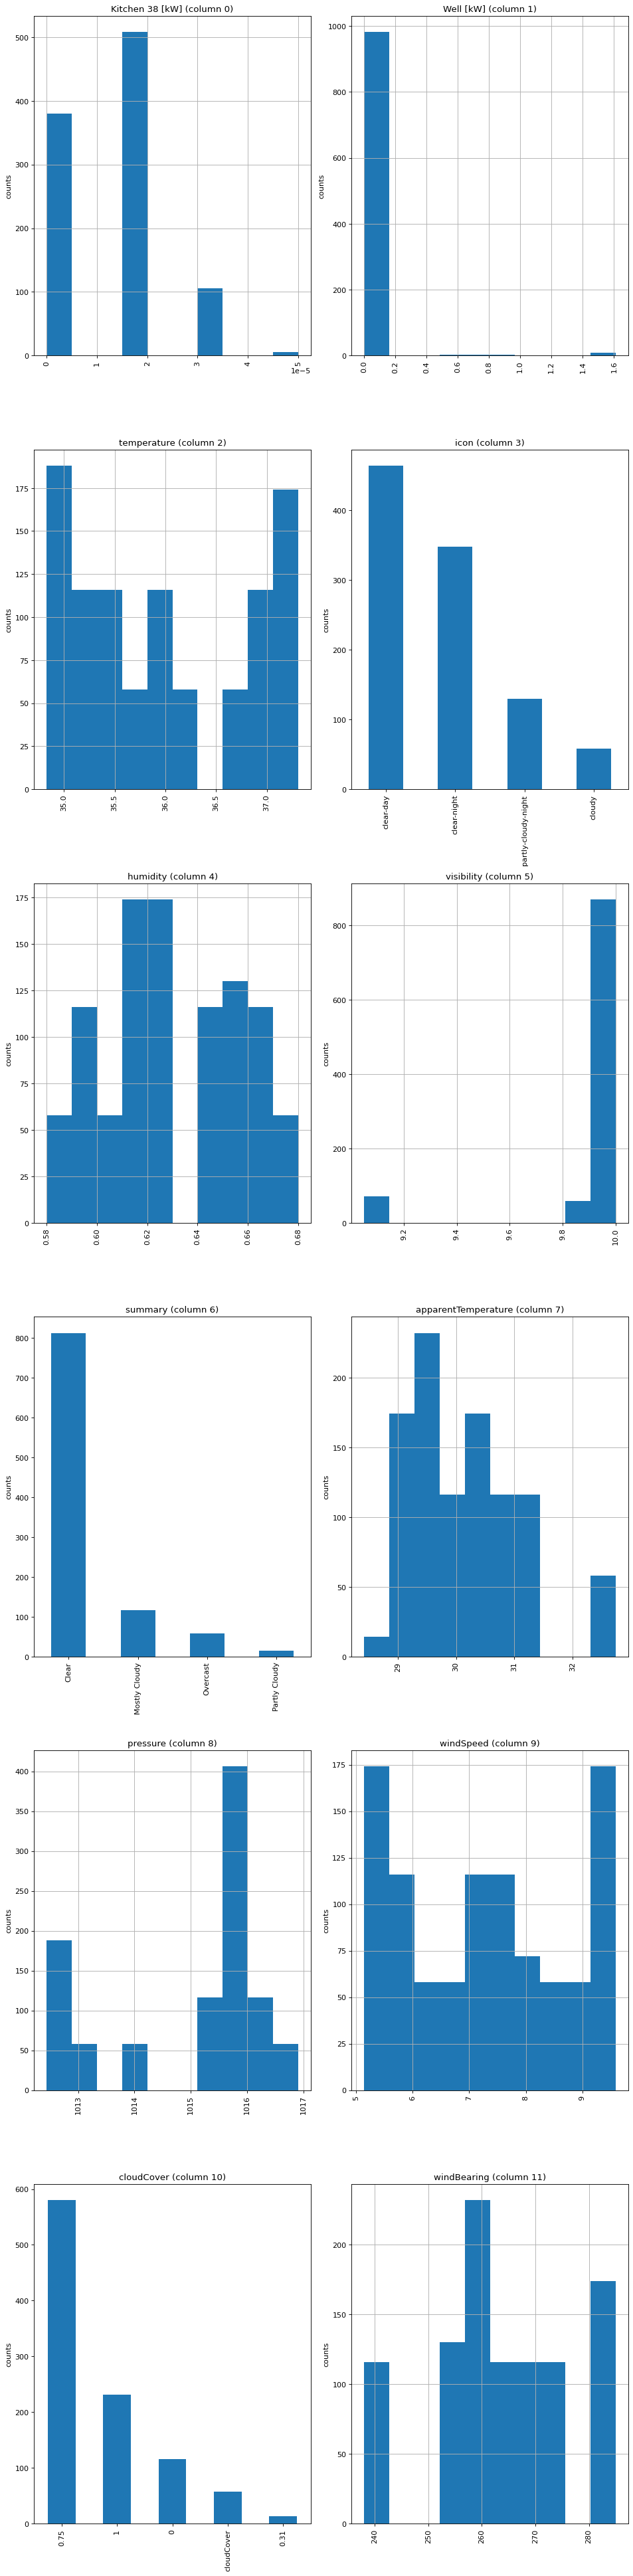

In [10]:
plotPerColumnDistribution(df1, 12, 2)

In [11]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


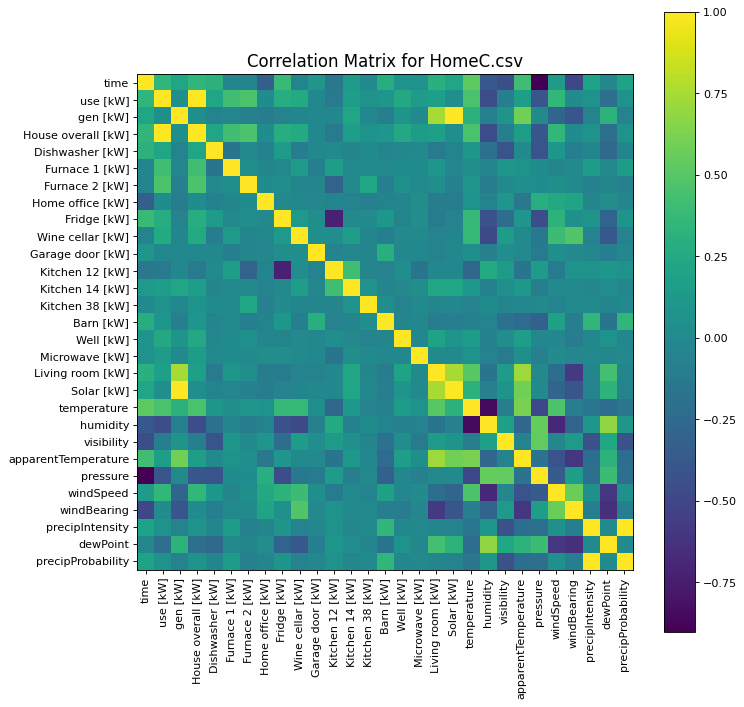

In [12]:
plotCorrelationMatrix(df1, 10)

<AxesSubplot:>

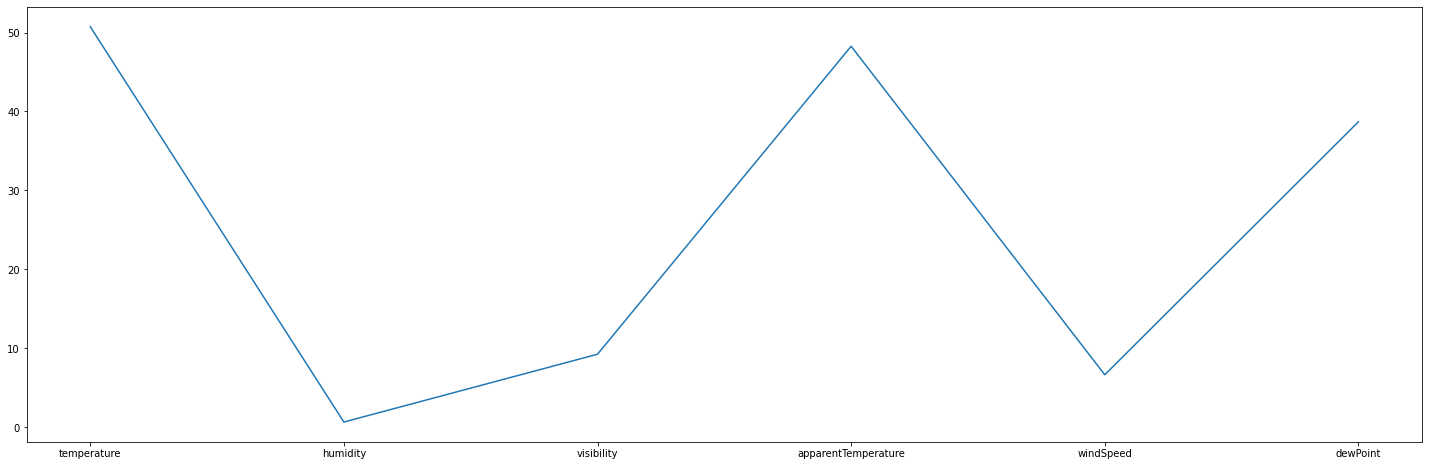

In [13]:
weather_columns = ['temperature','humidity', 'visibility', 'apparentTemperature', 
                   'windSpeed', 'dewPoint']

weather_per_month = df[weather_columns].mean()   

plt.figure(figsize=(25,8))

sns.lineplot(data=weather_per_month, dashes=False)



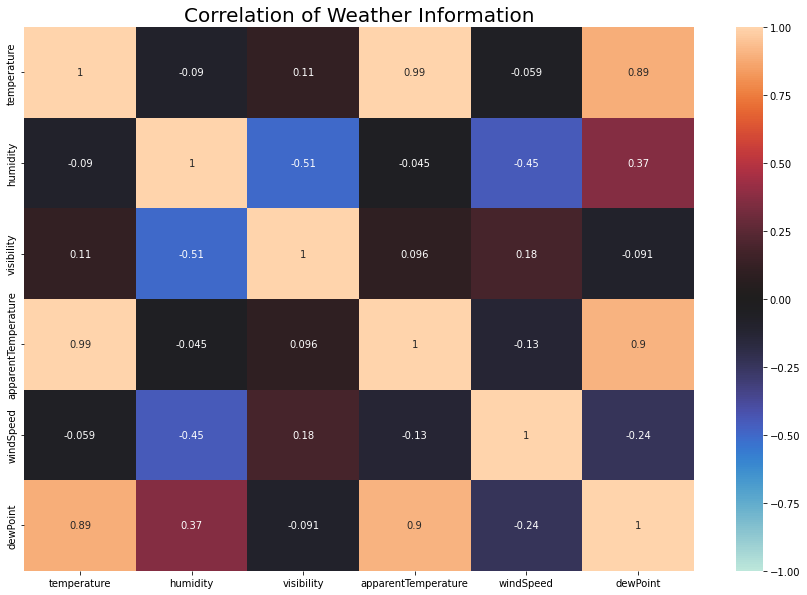

In [14]:
fig,ax = plt.subplots(figsize=(15, 10)) 
corr = df[weather_columns].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information', size=20)
plt.show()

In [15]:
# Rename columns to remove spaces and the kW unit 
df.columns = [col[:-5].replace(' ','_') if 'kW' in col else col for col in df.columns]

# Drop rows with nan values 
df = df.dropna()

# The columns "use" and "house_overall" are the same, so let's remove the 'house_overall' column
df.drop(['House_overall'], axis=1, inplace=True)

# The columns "gen" and "solar" are the same, so let's remove the 'solar' column
df.drop(['Solar'], axis=1, inplace=True)

# drop rows with cloudCover column values that are not numeric (bug in sensors) and convert column to numeric
df = df[df['cloudCover']!='cloudCover']
df["cloudCover"] = pd.to_numeric(df["cloudCover"])

# Create columns that regroup kitchens and furnaces 
df['kitchen'] = df['Kitchen_12'] + df['Kitchen_14'] + df['Kitchen_38']
df['Furnace'] = df['Furnace_1'] + df['Furnace_2']

# Convert "time" column (which is a unix timestamp) to a Y-m-d H-M-S 
import time 
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))
time_index = pd.date_range(start_time, periods=len(df), freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)
df.shape

(503852, 31)

In [16]:
# lower frist letter of a string  
func = lambda s: s[:1].lower() + s[1:] if s else ''

cols = list(df.dtypes.keys())
categ_cols = [col for col in cols if df[col].dtype=='O']
num_cols = [col for col in cols if col not in categ_cols]
print('categ_cols : ', categ_cols)
print('num_cols : ', num_cols)

categ_cols :  ['icon', 'summary']
num_cols :  ['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office', 'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14', 'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'kitchen', 'Furnace']


In [17]:
# Let's remove rows with values that appear less than a certain percentage %

def remove_less_percent(col, percent):
    keys_to_conserve = [key for key,value in df[col].value_counts(normalize=True).items() if value>=percent]
    return df[df[col].isin(keys_to_conserve)]

print(len(df))
df = remove_less_percent('summary', 0.05)
print(len(df))
df = remove_less_percent('icon', 0.05)
print(len(df))
df.shape

503852
466308
466308


(466308, 31)

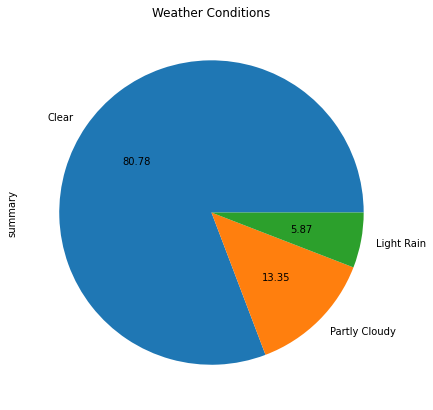

Clear            376672
Partly Cloudy     62268
Light Rain        27368
Name: summary, dtype: int64

In [18]:
plt.figure(figsize=(7,7))
df['summary'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Weather Conditions')
plt.show()
df['summary'].value_counts()

In [19]:
#mapping values
df.summary.unique()

Value_list = df['summary'].unique()

for x in range(len(Value_list)):
    df.summary[df['summary'] == Value_list[x]] = x-1
df.summary
df.drop('icon',axis='columns', inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:

df.drop('cloudCover',axis='columns', inplace=True)
#df.drop('time',axis='columns', inplace=True)

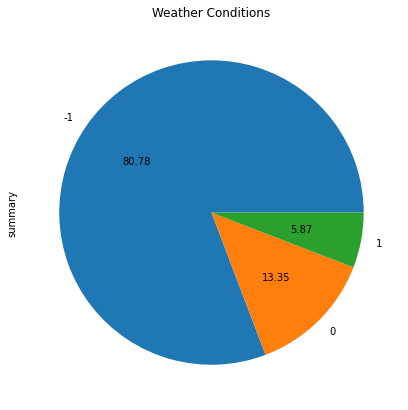

-1    376672
 0    376672
 1    376672
Name: summary, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
x,y = df.drop('summary',axis=1),df['summary']
y=y.astype('int') 
smote = SMOTE()
x,y = smote.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.9)
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape
df['summary'].unique()

plt.figure(figsize=(7,7))
df['summary'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Weather Conditions')
plt.show()
df['summary'].value_counts()
y.value_counts()

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn import metrics  
RandomForestClassifierScore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy obtained by Random Forest Classifier :",metrics.accuracy_score(y_test, y_pred))

Accuracy obtained by Random Forest Classifier : 0.9988299090967193


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 99.64238482224943


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 98.44761385033652


In [25]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(x_train, y_train);
CatBoostClassifierScore = cat.score(x_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Learning rate set to 0.5
0:	learn: 0.6203796	total: 107ms	remaining: 964ms
1:	learn: 0.4803761	total: 156ms	remaining: 623ms
2:	learn: 0.4088621	total: 203ms	remaining: 475ms
3:	learn: 0.3491750	total: 254ms	remaining: 382ms
4:	learn: 0.3185204	total: 298ms	remaining: 298ms
5:	learn: 0.2943088	total: 347ms	remaining: 231ms
6:	learn: 0.2743978	total: 391ms	remaining: 168ms
7:	learn: 0.2661217	total: 438ms	remaining: 110ms
8:	learn: 0.2614129	total: 479ms	remaining: 53.2ms
9:	learn: 0.2564337	total: 523ms	remaining: 0us
Accuracy obtained by CatBoost Classifier model: 89.31323530134758


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 84.2275679316431


In [27]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train)
MLPCScore = clf.score(x_test,y_test)
print("Accuracy obtained by MLPC Classifier:",MLPCScore*100)

Accuracy obtained by MLPC Classifier: 33.31681440293408


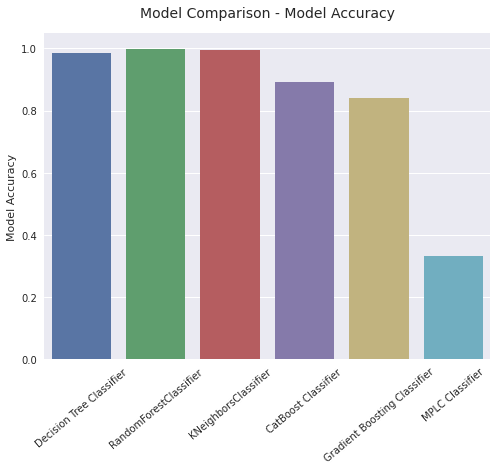

In [28]:
plt.style.use("seaborn")

x = [
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "CatBoost Classifier",
    "Gradient Boosting Classifier",
"MPLC Classifier"]

y = [
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore,GradientBoostingClassifierScore, MLPCScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);